<a href="https://www.kaggle.com/code/patimejia/insights-dnn-diagnostics-activations-gradients?scriptVersionId=138076513" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---

> #### **Goal**: This code is designed for analysis of deep neural networks. Through visualizing activations, weights, and gradients, we identify issues stemming from activation functions. Much like the length of a pendulum determines its swing frequency, (i.e. $\frac{1}{t_{j-i}}$ hertz), activation functions shape a network's reaction to data.

---
# Deep Neural Networks: Addressing the Gradient Problem

Deep neural networks are powerful tools in machine learning. However, training them can present challenges. One notable challenge is the vanishing and exploding gradient problem during backpropagation. The choice of activation functions can significantly influence these issues.

## Activation Functions

Activation functions introduce non-linearity into the network, enabling it to learn from the error and make adjustments, which is essential for learning complex patterns.

### 1. Sigmoid
 $$f(x) = \frac{1}{1 + e^{-x}} $$
- **Range**: [0, 1]
- **Challenge**: Can lead to vanishing gradients in deep networks due to its saturation for large positive or negative inputs.
- **Gradient**: 
 $\frac{\partial f(x)}{\partial x} = f(x)(1 - f(x)) $

### 2. ReLU (Rectified Linear Unit)
$$ f(x) = \max(0, x) $$
- **Range**: $[0, \infty)$
- **Benefit**: Mitigates the vanishing gradient problem.
- **Challenge**: Can lead to exploding gradients if not carefully initialized or regularized.

### 3. Leaky ReLU
$$f(x) = 
\begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{otherwise}
\end{cases} 
$$
- **Range**: $(- \infty, \infty)$
- **Benefit**: Addresses the "dying ReLU" problem where neurons never activate.
- **Parameter**: $\alpha$ is a small positive constant (e.g., $0.01$).

### 4. Tanh
$$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$
- **Range**: $[-1, 1]$
- **Note**: It's a scaled and shifted version of the sigmoid function. In fact, it scales the sigmoid's output by 2 and shifts it down by 1.

### 5. Arctangent
$$ f(x) = \arctan(x) $$
- **Range**: $[- \frac{\pi}{2}, \frac{\pi}{2}]$

## Gradient Dynamics

- **Vanishing Gradient**: Occurs when gradients approach zero, stalling the training process. Often observed with activation functions that squash their inputs into a small range, especially when inputs are large.

- **Exploding Gradient**: Occurs when gradients grow too large, causing divergent behavior. This can be due to deep networks, large parameter values, or particular activation functions.

## Mitigating Strategies

1. **Proper Initialization**: Initialize weights in a manner that neither amplifies nor diminishes gradients during backpropagation.
2. **Shortcuts/Residual connections**: Used in architectures like ResNets, these allow gradients to skip layers and mitigate the vanishing gradient issue.
3. **Gradient Clipping**: A technique to prevent gradients from exceeding a threshold and thus prevent the exploding gradient problem.

## Diagnostic Code

The code provided is a tool designed to help visualize the behavior of different activation functions in deep neural networks. By examining activations, weights, and gradients, we can gain insight into and potentially address the challenges associated with them.


[LEAKY_RELU] Extracting neuron activations (outputs) for input data [[ 1. ]
 [ 0.5]
 [-1. ]
 [-0.5]]. This helps us understand how data flows through the network.

[LEAKY_RELU] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[LEAKY_RELU] Computing gradients to understand how much the error will change if the weights are adjusted. This is crucial for learning.

[LEAKY_RELU] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[LEAKY_RELU] Computing gradients to understand how much the error will change if the weights are adjusted. This is crucial for learning.

[LEAKY_RELU] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[LEAKY_RELU] Checking for potential gradient issues like vanishing or exploding gradients which can hinder learning.
[Warning] leaky_relu has potential vanishing gradien

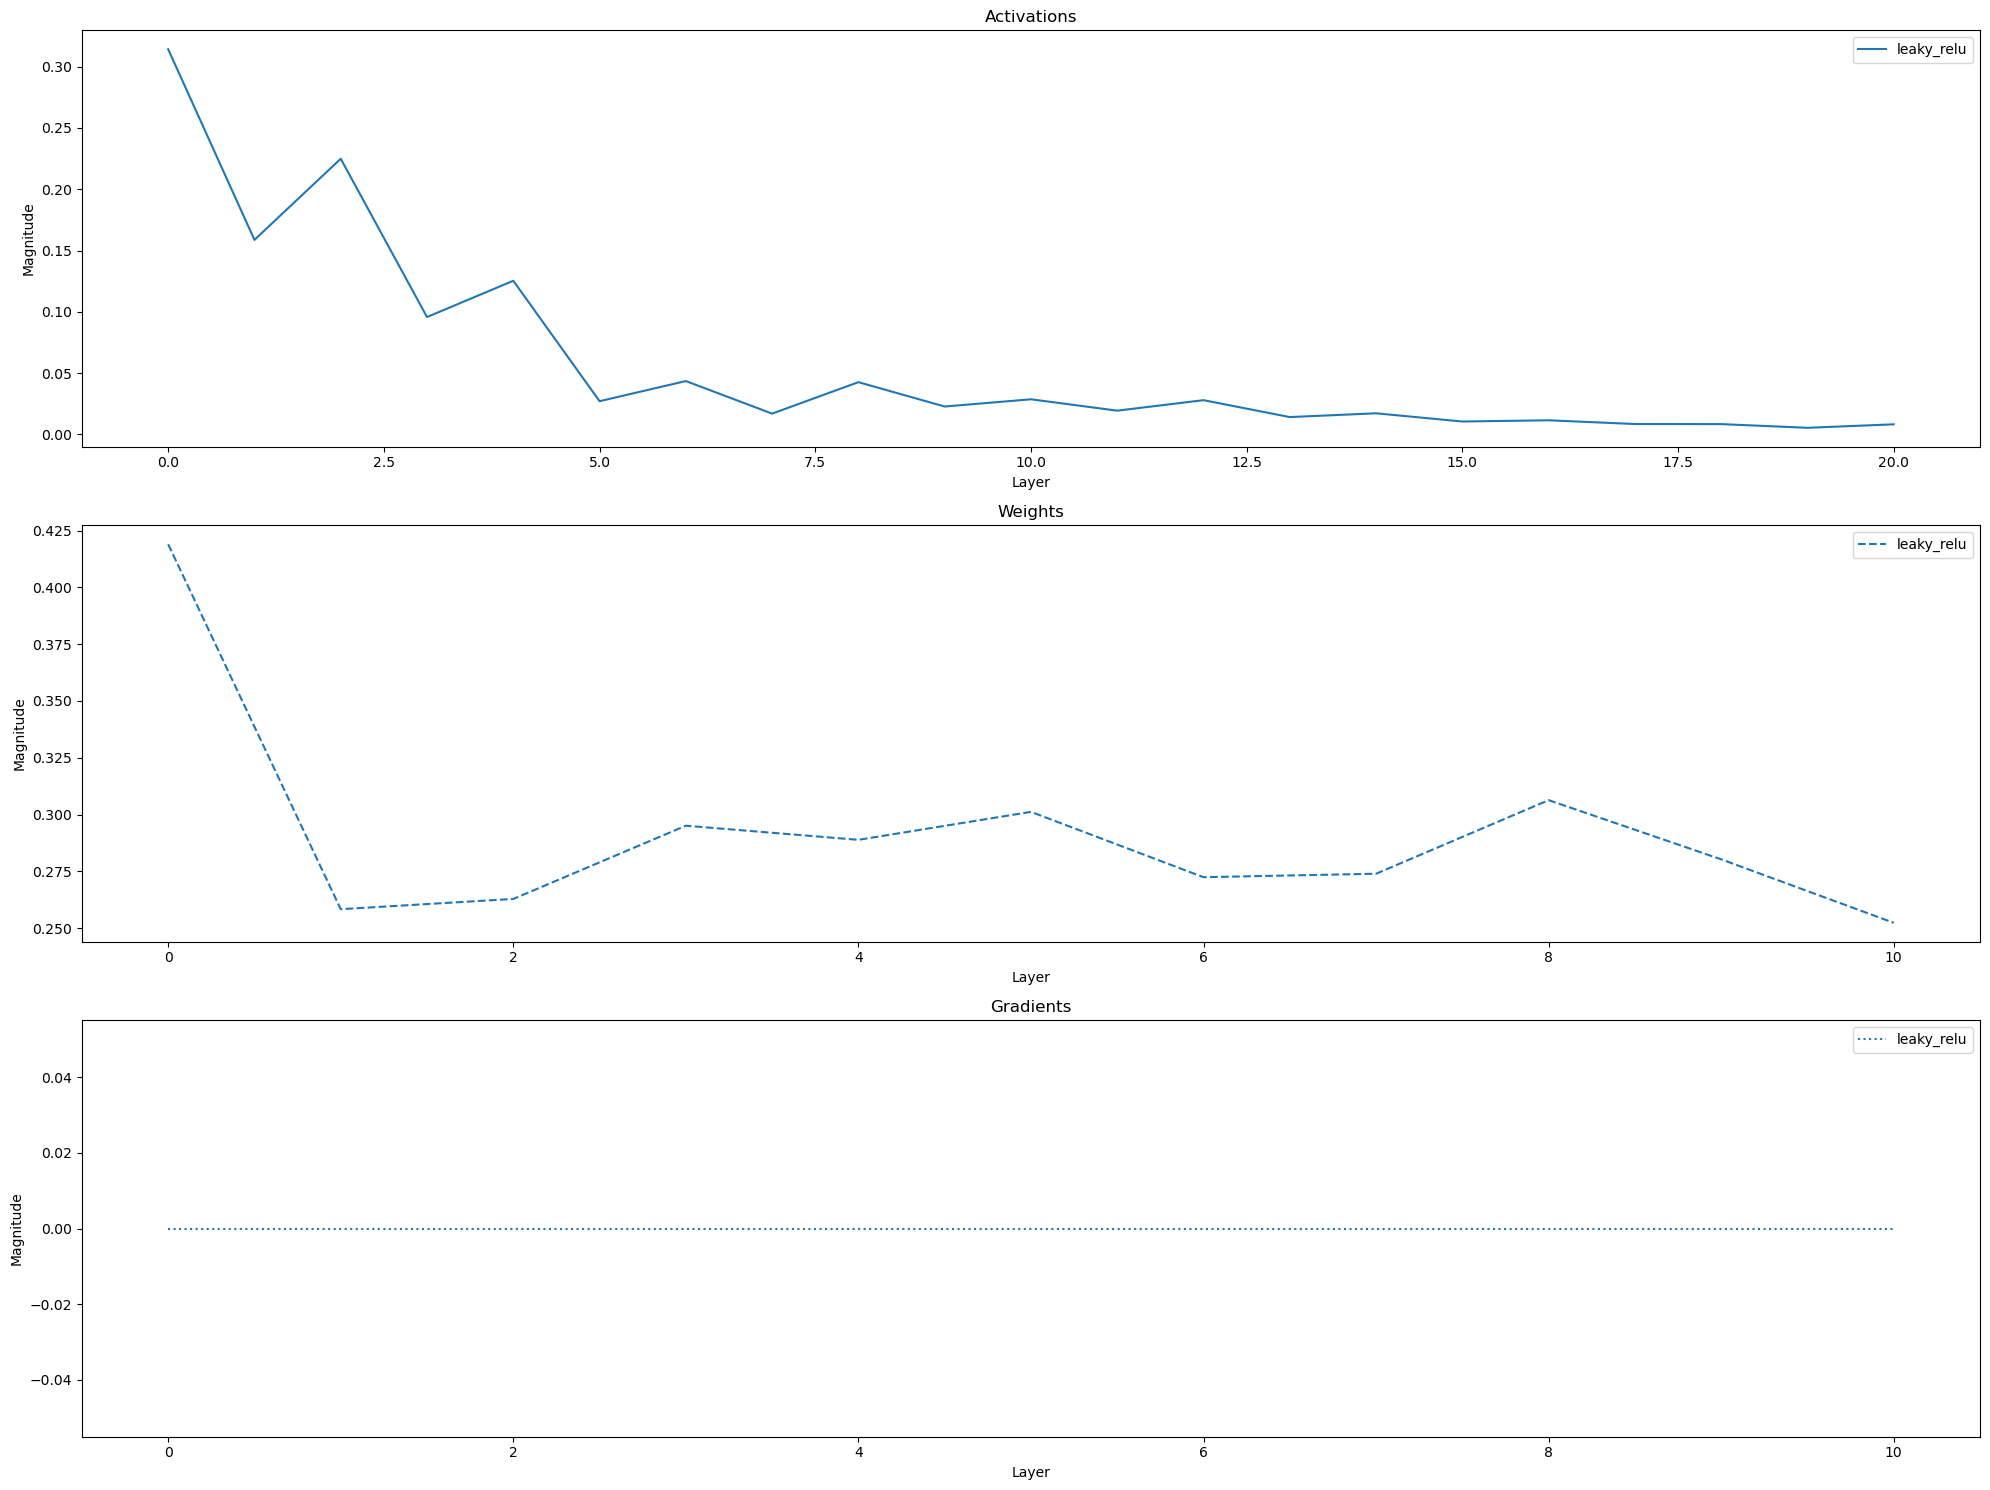


[SIGMOID] Extracting neuron activations (outputs) for input data [[ 1. ]
 [ 0.5]
 [-1. ]
 [-0.5]]. This helps us understand how data flows through the network.

[RELU] Extracting neuron activations (outputs) for input data [[ 1. ]
 [ 0.5]
 [-1. ]
 [-0.5]]. This helps us understand how data flows through the network.

[TANH] Extracting neuron activations (outputs) for input data [[ 1. ]
 [ 0.5]
 [-1. ]
 [-0.5]]. This helps us understand how data flows through the network.

[SIGMOID] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[RELU] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[TANH] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[SIGMOID] Computing gradients to understand how much the error will change if the weights are adjusted. This is crucial for learning.

[SIGMOID] Re

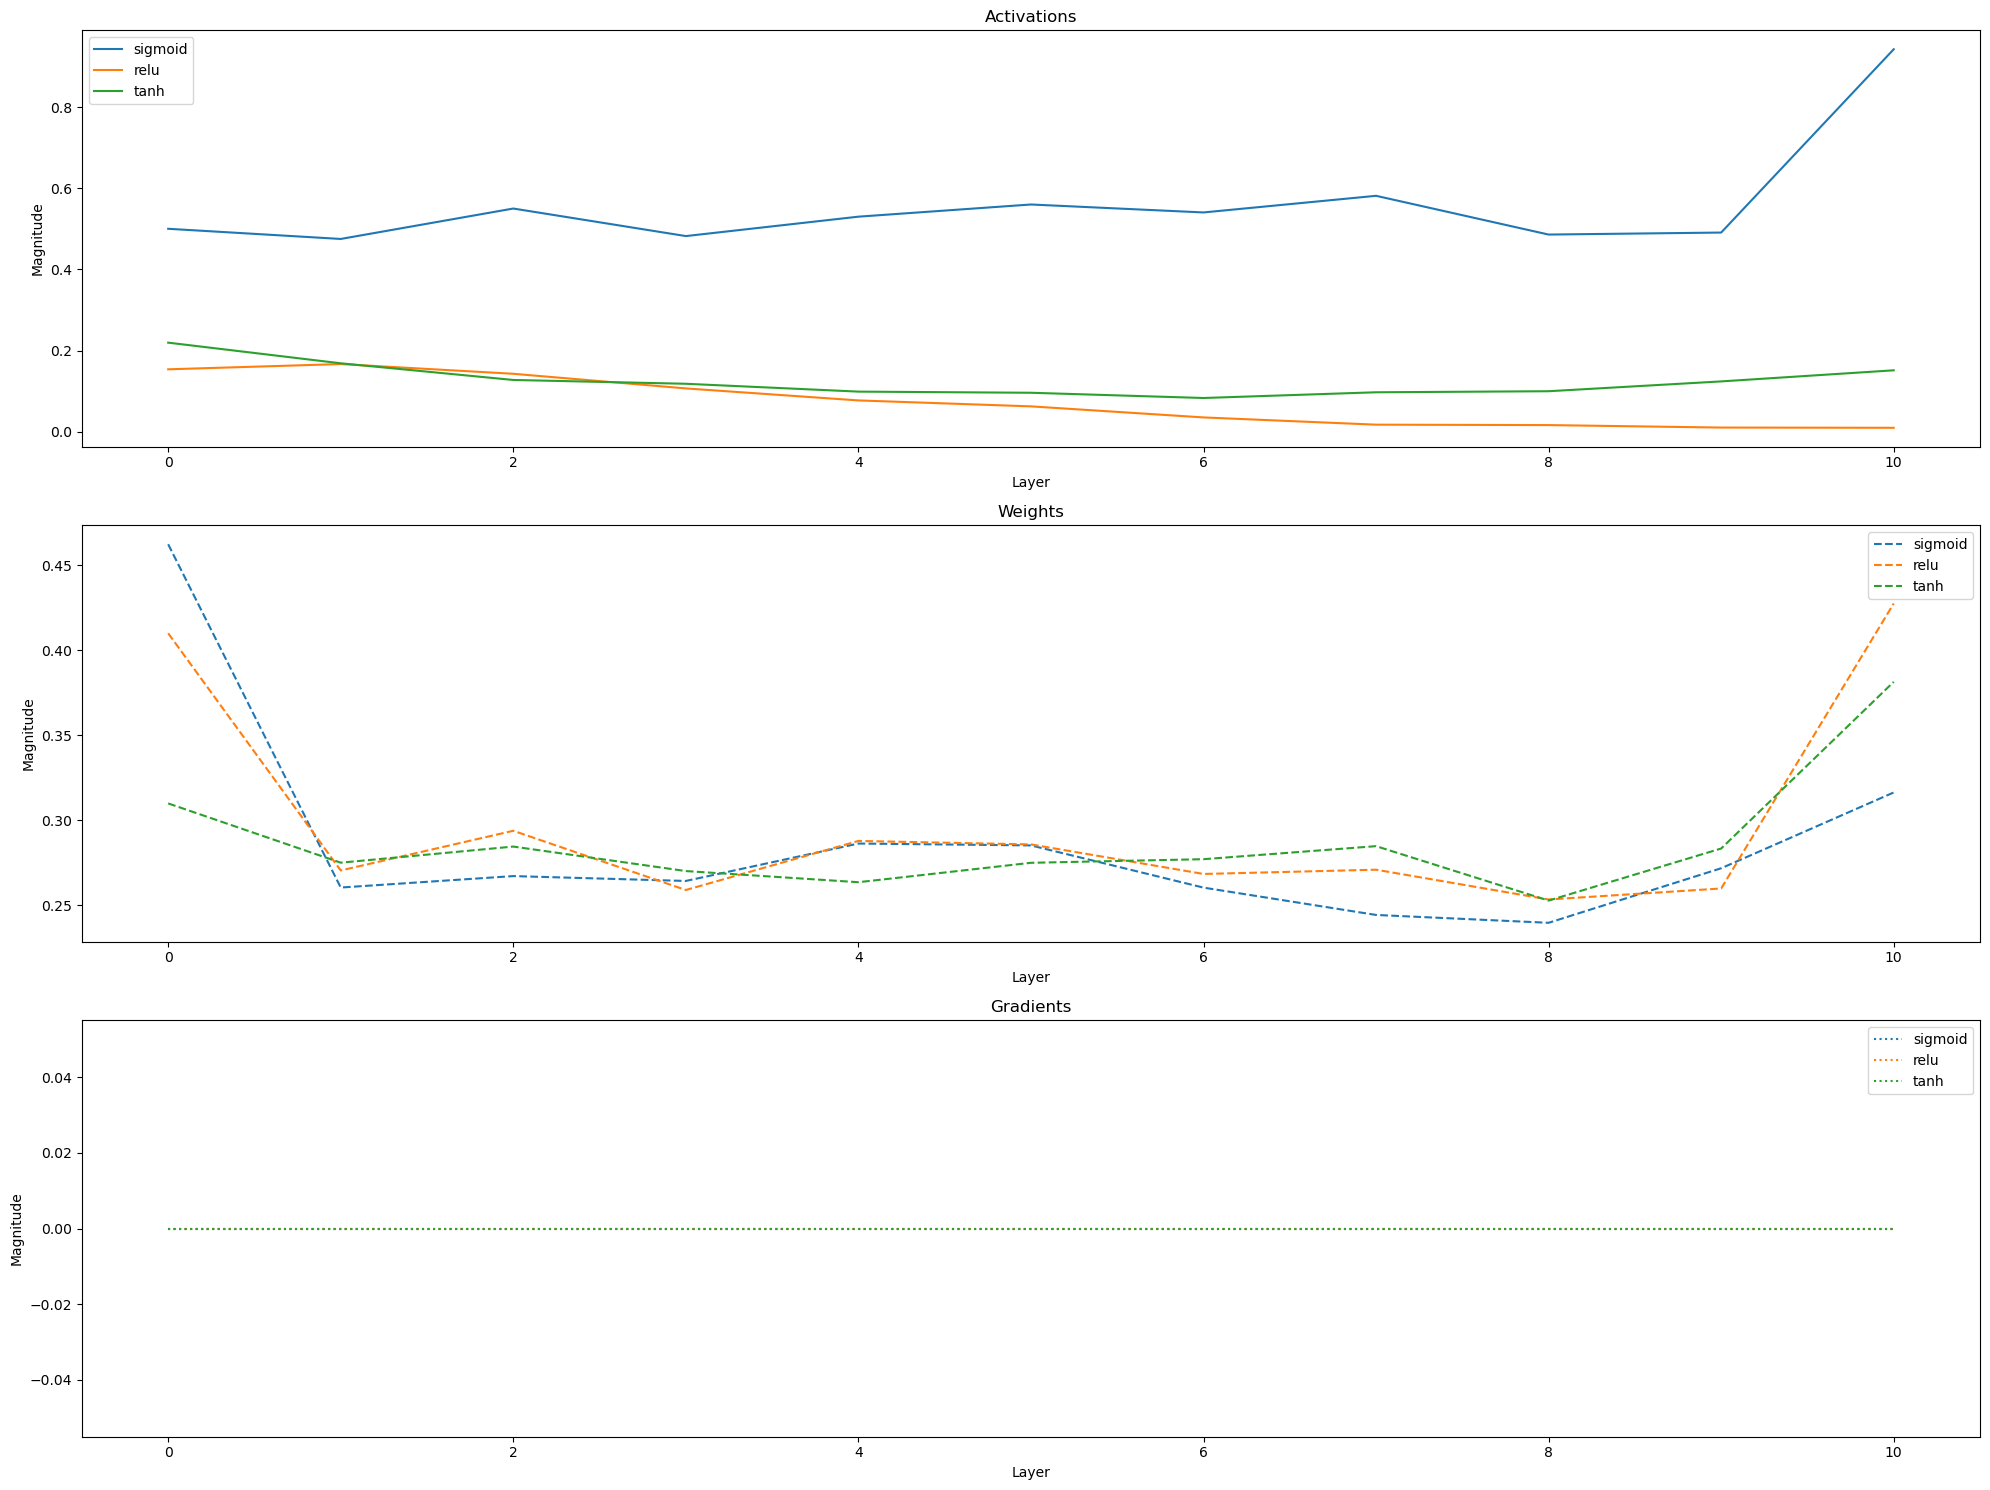

In [10]:
import os
import warnings
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LeakyReLU

# Suppress TensorFlow logs and Python warnings for clearer output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")

def create_network(activation, layers, units, output_units):
    """ Create a neural network model based on the given activation function."""
    model = tf.keras.Sequential()
    
    for _ in range(layers):
        if activation == 'leaky_relu':
            model.add(Dense(units))
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Dense(units, activation=activation))
            
    model.add(Dense(output_units))
    model.build(input_shape=(None, 1))
    return model

def get_activations_for_model(model, data, activation_type):
    """Extract activations for the given data."""
    print(f"\n[{activation_type.upper()}] Extracting neuron activations (outputs) for input data {data.numpy()}. This helps us understand how data flows through the network.")
    return [tf.keras.Model(inputs=model.input, outputs=layer.output).predict(data, verbose=0) for layer in model.layers]

def get_weights_for_model(model, activation_type):
    """Extract weights from the model."""
    print(f"\n[{activation_type.upper()}] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.")
    return [layer.get_weights()[0] for layer in model.layers if layer.get_weights()]

def compute_gradients(model, data, activation_type):
    """Compute gradients for the given data."""
    print(f"\n[{activation_type.upper()}] Computing gradients to understand how much the error will change if the weights are adjusted. This is crucial for learning.")
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(data)
        predictions = model(data)
    
    gradient_input = tape.gradient(predictions, data).numpy()
    weights_tf = [tf.convert_to_tensor(weight) for weight in get_weights_for_model(model, activation_type)]
    gradient_weights = [tape.gradient(predictions, weight).numpy() if tape.gradient(predictions, weight) else np.zeros_like(weight.numpy()) for weight in weights_tf]
    del tape
    return gradient_input, gradient_weights

def identify_gradient_issues(gradient_weights, activation_type):
    """Identify potential gradient issues."""
    print(f"\n[{activation_type.upper()}] Checking for potential gradient issues like vanishing or exploding gradients which can hinder learning.")
    gradient_issues = {"vanishing": [], "exploding": []}
    for idx, gradient in enumerate(gradient_weights):
        if np.linalg.norm(gradient) < 1e-5:
            gradient_issues["vanishing"].append(idx)
        elif np.linalg.norm(gradient) > 1e3:
            gradient_issues["exploding"].append(idx)
    return gradient_issues

def plot_function(data, label, title, linestyle='-'):
    """Plot the function based on given data."""
    avg_magnitudes = [np.mean(np.abs(d)) for d in data]
    plt.plot(avg_magnitudes, label=label, linestyle=linestyle)

def plot_diagnostics(models, data):
    """Visualize the behavior of different activation functions."""
    plt.figure(figsize=(20, 15))
    diagnostics = [("Activations", '-'), ("Weights", '--'), ("Gradients", ':')]
    
    for idx, (title, linestyle) in enumerate(diagnostics, 1):
        plt.subplot(3, 1, idx)
        for activation_type, model in models.items():
            if title == "Activations":
                data_to_plot = get_activations_for_model(model, data, activation_type)  # pass the activation_type here
            elif title == "Weights":
                data_to_plot = get_weights_for_model(model, activation_type)  # and here
            else:
                _, gradient_weights = compute_gradients(model, data, activation_type)  # and here
                data_to_plot = gradient_weights
            
            plot_function(data_to_plot, activation_type, title, linestyle)
        
        plt.xlabel('Layer')
        plt.ylabel('Magnitude')
        plt.title(title)
        plt.legend()
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            plt.tight_layout()
    
    for activation_type, model in models.items():
        _, gradient_weights = compute_gradients(model, data, activation_type)  # and here
        gradient_issues = identify_gradient_issues(gradient_weights, activation_type)  # and here
        if gradient_issues["vanishing"]:
            print(f"[Warning] {activation_type} has potential vanishing gradient issues at layers: {gradient_issues['vanishing']}")
        if gradient_issues["exploding"]:
            print(f"[Warning] {activation_type} has potential exploding gradient issues at layers: {gradient_issues['exploding']}")
    
    plt.show()


# Dedicated analysis for Leaky ReLU
leaky_relu_model = create_network('leaky_relu', 10, 10, 1)
data_batch = tf.constant([[1.0], [0.5], [-1.0], [-0.5]])
plot_diagnostics({'leaky_relu': leaky_relu_model}, data_batch)

# Comparison with other activation functions
ACTIVATIONS = ['sigmoid', 'relu', 'tanh']
models_dict = {activation: create_network(activation, 10, 10, 1) for activation in ACTIVATIONS}
plot_diagnostics(models_dict, data_batch)


Analysis for SIGMOID Activation
----------------------------------------


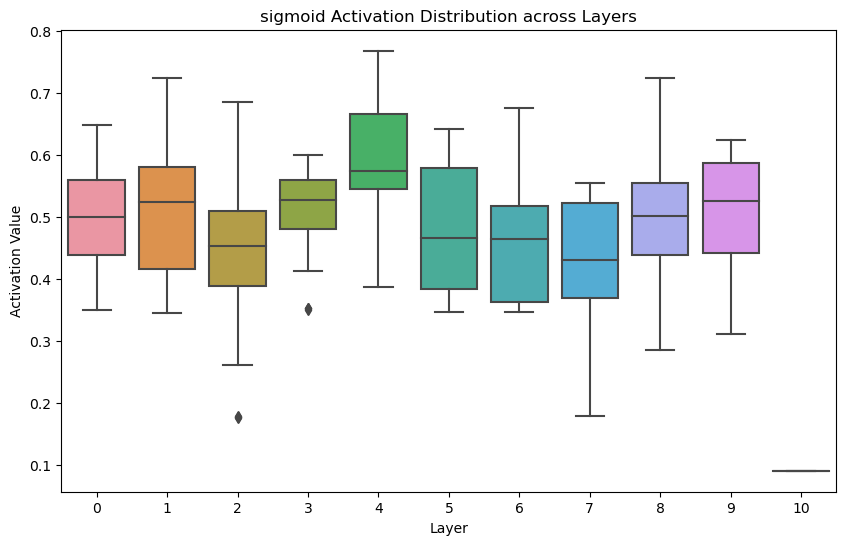

Layer 1 - Mean Activation: 0.5000, Standard Deviation: 0.0757
Layer 2 - Mean Activation: 0.5127, Standard Deviation: 0.1085
Layer 3 - Mean Activation: 0.4333, Standard Deviation: 0.1323
Layer 4 - Mean Activation: 0.5088, Standard Deviation: 0.0714
Layer 5 - Mean Activation: 0.5838, Standard Deviation: 0.1082
Layer 6 - Mean Activation: 0.4744, Standard Deviation: 0.0973
Layer 7 - Mean Activation: 0.4640, Standard Deviation: 0.0985
Layer 8 - Mean Activation: 0.4295, Standard Deviation: 0.1113
Layer 9 - Mean Activation: 0.5042, Standard Deviation: 0.1146
Layer 10 - Mean Activation: 0.5033, Standard Deviation: 0.0900
Layer 11 - Mean Activation: 0.0912, Standard Deviation: 0.0000


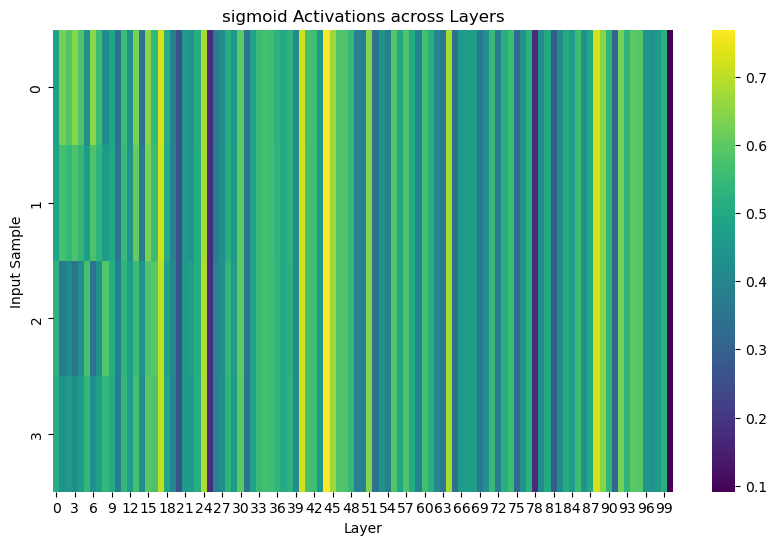

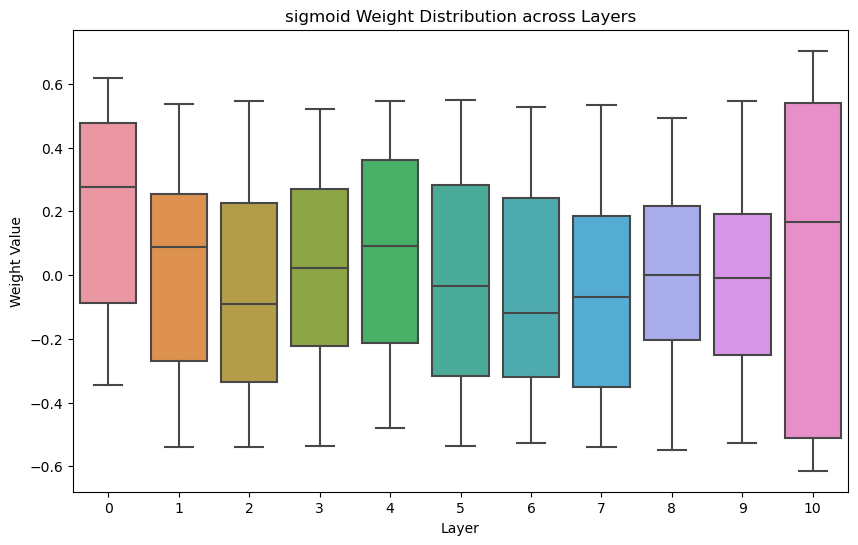

Layer 1 - Mean Weight: 0.1877, Standard Deviation: 0.3423
Layer 2 - Mean Weight: 0.0111, Standard Deviation: 0.3062
Layer 3 - Mean Weight: -0.0430, Standard Deviation: 0.3281
Layer 4 - Mean Weight: 0.0129, Standard Deviation: 0.2913
Layer 5 - Mean Weight: 0.0723, Standard Deviation: 0.3122
Layer 6 - Mean Weight: -0.0175, Standard Deviation: 0.3419
Layer 7 - Mean Weight: -0.0417, Standard Deviation: 0.3060
Layer 8 - Mean Weight: -0.0704, Standard Deviation: 0.2970
Layer 9 - Mean Weight: 0.0005, Standard Deviation: 0.2930
Layer 10 - Mean Weight: -0.0085, Standard Deviation: 0.3026
Layer 11 - Mean Weight: 0.0577, Standard Deviation: 0.5161


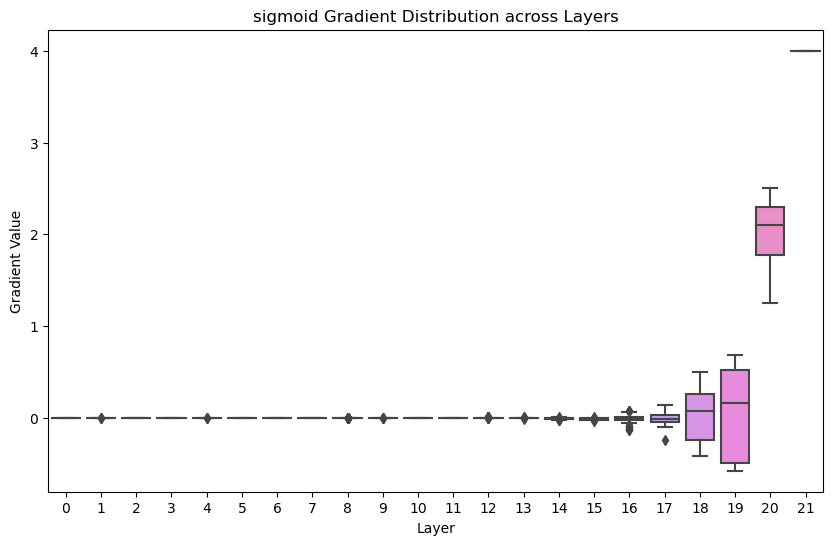

Layer 1 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 2 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 3 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 4 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 5 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 6 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 7 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 8 - Mean Gradient: -0.0000, Standard Deviation: 0.0001
Layer 9 - Mean Gradient: -0.0000, Standard Deviation: 0.0002
Layer 10 - Mean Gradient: -0.0000, Standard Deviation: 0.0003
Layer 11 - Mean Gradient: -0.0000, Standard Deviation: 0.0008
Layer 12 - Mean Gradient: -0.0000, Standard Deviation: 0.0014
Layer 13 - Mean Gradient: 0.0008, Standard Deviation: 0.0024
Layer 14 - Mean Gradient: 0.0018, Standard Deviation: 0.0049
Layer 15 - Mean Gradient: -0.0061, Standard Deviation: 0.0066
Layer 16 - Mean Gradient: -0.0131, Standard Deviation: 0.0137
Layer 17 - Mean Grad

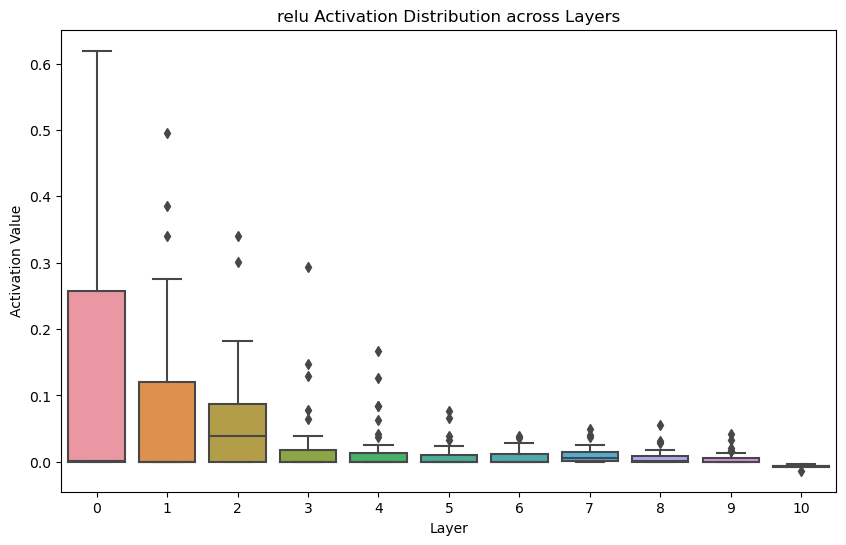

Layer 1 - Mean Activation: 0.1320, Standard Deviation: 0.1842
Layer 2 - Mean Activation: 0.0744, Standard Deviation: 0.1222
Layer 3 - Mean Activation: 0.0668, Standard Deviation: 0.0834
Layer 4 - Mean Activation: 0.0230, Standard Deviation: 0.0548
Layer 5 - Mean Activation: 0.0174, Standard Deviation: 0.0371
Layer 6 - Mean Activation: 0.0089, Standard Deviation: 0.0171
Layer 7 - Mean Activation: 0.0065, Standard Deviation: 0.0109
Layer 8 - Mean Activation: 0.0099, Standard Deviation: 0.0119
Layer 9 - Mean Activation: 0.0067, Standard Deviation: 0.0109
Layer 10 - Mean Activation: 0.0048, Standard Deviation: 0.0093
Layer 11 - Mean Activation: -0.0075, Standard Deviation: 0.0037


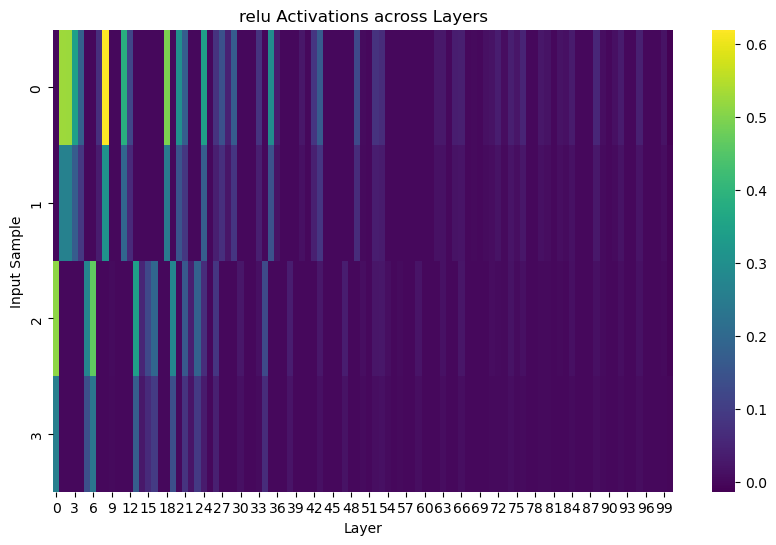

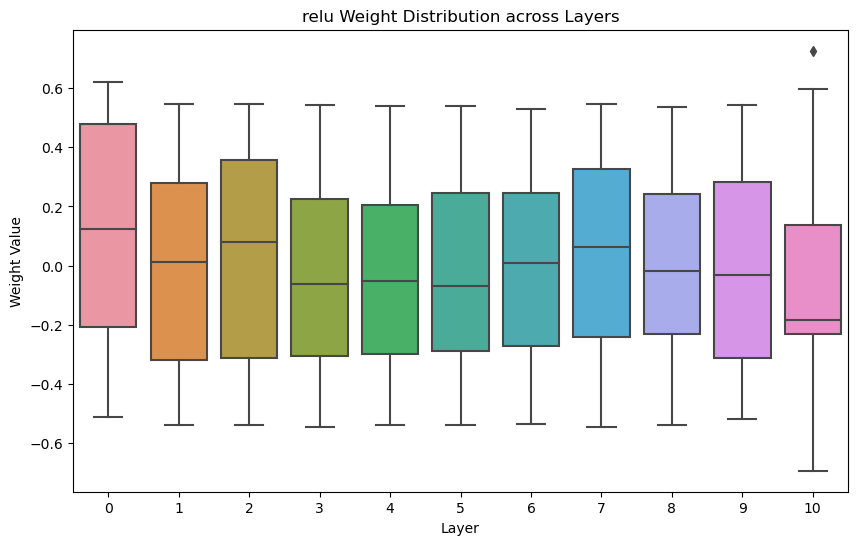

Layer 1 - Mean Weight: 0.1004, Standard Deviation: 0.3928
Layer 2 - Mean Weight: -0.0046, Standard Deviation: 0.3343
Layer 3 - Mean Weight: 0.0500, Standard Deviation: 0.3338
Layer 4 - Mean Weight: -0.0471, Standard Deviation: 0.3069
Layer 5 - Mean Weight: -0.0287, Standard Deviation: 0.3201
Layer 6 - Mean Weight: -0.0316, Standard Deviation: 0.3096
Layer 7 - Mean Weight: -0.0069, Standard Deviation: 0.2997
Layer 8 - Mean Weight: 0.0359, Standard Deviation: 0.3217
Layer 9 - Mean Weight: 0.0091, Standard Deviation: 0.3036
Layer 10 - Mean Weight: -0.0022, Standard Deviation: 0.3261
Layer 11 - Mean Weight: -0.0553, Standard Deviation: 0.4244


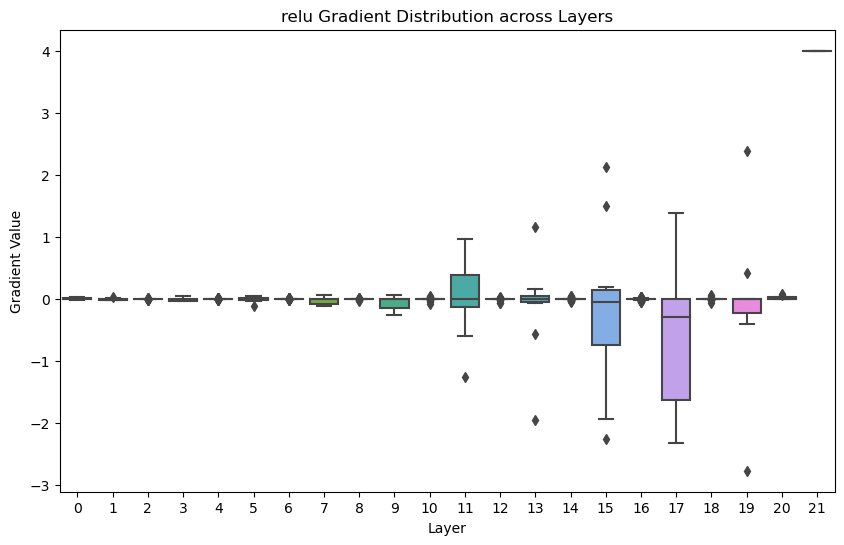

Layer 1 - Mean Gradient: 0.0006, Standard Deviation: 0.0134
Layer 2 - Mean Gradient: -0.0071, Standard Deviation: 0.0164
Layer 3 - Mean Gradient: -0.0015, Standard Deviation: 0.0049
Layer 4 - Mean Gradient: -0.0117, Standard Deviation: 0.0227
Layer 5 - Mean Gradient: -0.0012, Standard Deviation: 0.0058
Layer 6 - Mean Gradient: -0.0155, Standard Deviation: 0.0434
Layer 7 - Mean Gradient: -0.0016, Standard Deviation: 0.0053
Layer 8 - Mean Gradient: -0.0307, Standard Deviation: 0.0586
Layer 9 - Mean Gradient: -0.0014, Standard Deviation: 0.0062
Layer 10 - Mean Gradient: -0.0667, Standard Deviation: 0.1004
Layer 11 - Mean Gradient: -0.0010, Standard Deviation: 0.0137
Layer 12 - Mean Gradient: -0.0013, Standard Deviation: 0.5896
Layer 13 - Mean Gradient: -0.0015, Standard Deviation: 0.0114
Layer 14 - Mean Gradient: -0.1234, Standard Deviation: 0.7313
Layer 15 - Mean Gradient: -0.0009, Standard Deviation: 0.0142
Layer 16 - Mean Gradient: -0.1782, Standard Deviation: 1.2772
Layer 17 - Mean Gr

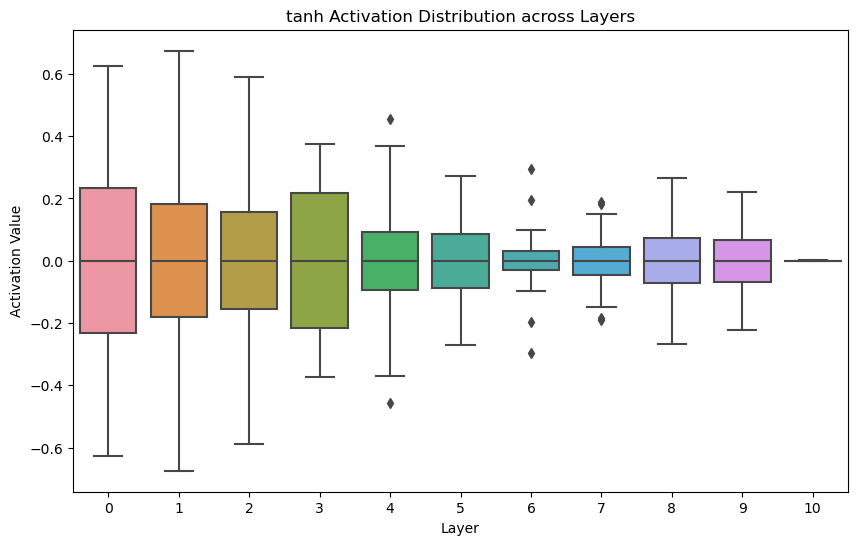

Layer 1 - Mean Activation: 0.0000, Standard Deviation: 0.3275
Layer 2 - Mean Activation: 0.0000, Standard Deviation: 0.2853
Layer 3 - Mean Activation: 0.0000, Standard Deviation: 0.2249
Layer 4 - Mean Activation: -0.0000, Standard Deviation: 0.2389
Layer 5 - Mean Activation: 0.0000, Standard Deviation: 0.1819
Layer 6 - Mean Activation: 0.0000, Standard Deviation: 0.1154
Layer 7 - Mean Activation: 0.0000, Standard Deviation: 0.0888
Layer 8 - Mean Activation: 0.0000, Standard Deviation: 0.0877
Layer 9 - Mean Activation: 0.0000, Standard Deviation: 0.1053
Layer 10 - Mean Activation: 0.0000, Standard Deviation: 0.1028
Layer 11 - Mean Activation: 0.0000, Standard Deviation: 0.0010


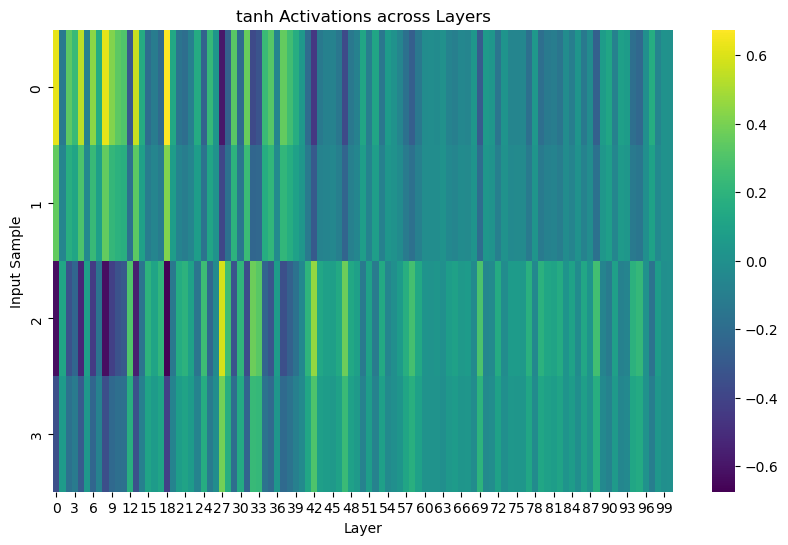

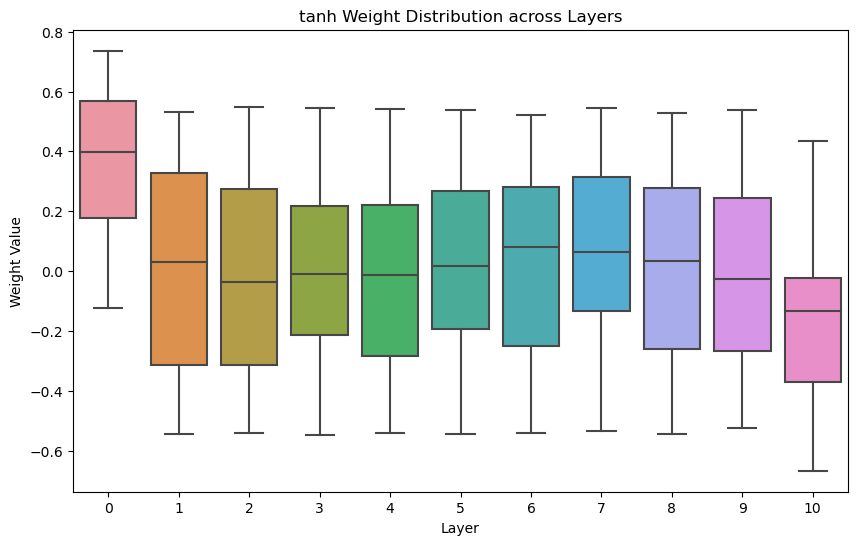

Layer 1 - Mean Weight: 0.3522, Standard Deviation: 0.2909
Layer 2 - Mean Weight: 0.0180, Standard Deviation: 0.3421
Layer 3 - Mean Weight: -0.0128, Standard Deviation: 0.3299
Layer 4 - Mean Weight: -0.0118, Standard Deviation: 0.2894
Layer 5 - Mean Weight: -0.0205, Standard Deviation: 0.2998
Layer 6 - Mean Weight: 0.0230, Standard Deviation: 0.3019
Layer 7 - Mean Weight: 0.0278, Standard Deviation: 0.3078
Layer 8 - Mean Weight: 0.0700, Standard Deviation: 0.2822
Layer 9 - Mean Weight: 0.0150, Standard Deviation: 0.3158
Layer 10 - Mean Weight: -0.0039, Standard Deviation: 0.3025
Layer 11 - Mean Weight: -0.1559, Standard Deviation: 0.3052


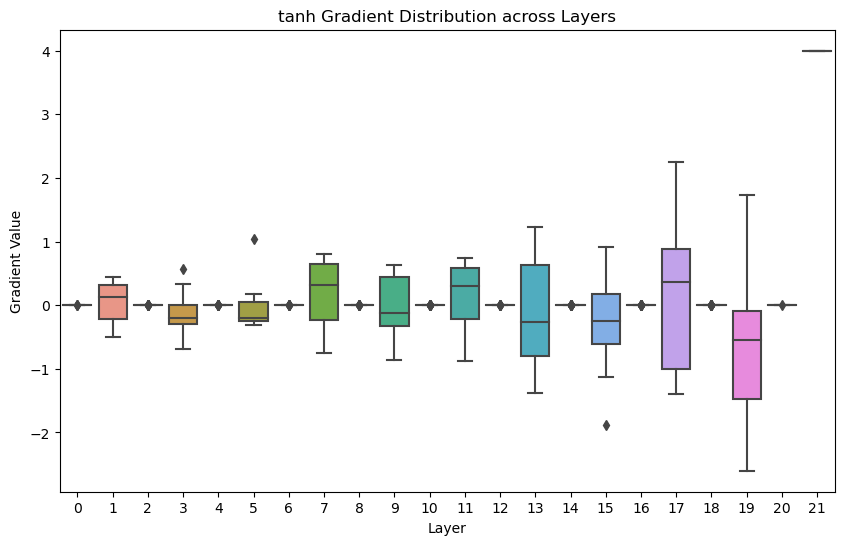

Layer 1 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 2 - Mean Gradient: 0.0402, Standard Deviation: 0.3315
Layer 3 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 4 - Mean Gradient: -0.1181, Standard Deviation: 0.3428
Layer 5 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 6 - Mean Gradient: -0.0242, Standard Deviation: 0.3871
Layer 7 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 8 - Mean Gradient: 0.1606, Standard Deviation: 0.5649
Layer 9 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 10 - Mean Gradient: -0.0444, Standard Deviation: 0.5027
Layer 11 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 12 - Mean Gradient: 0.1375, Standard Deviation: 0.5508
Layer 13 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 14 - Mean Gradient: -0.1105, Standard Deviation: 0.8549
Layer 15 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 16 - Mean Gradient: -0.3063, Standard Deviation: 0.7627
Layer 17 - Mean Gradi

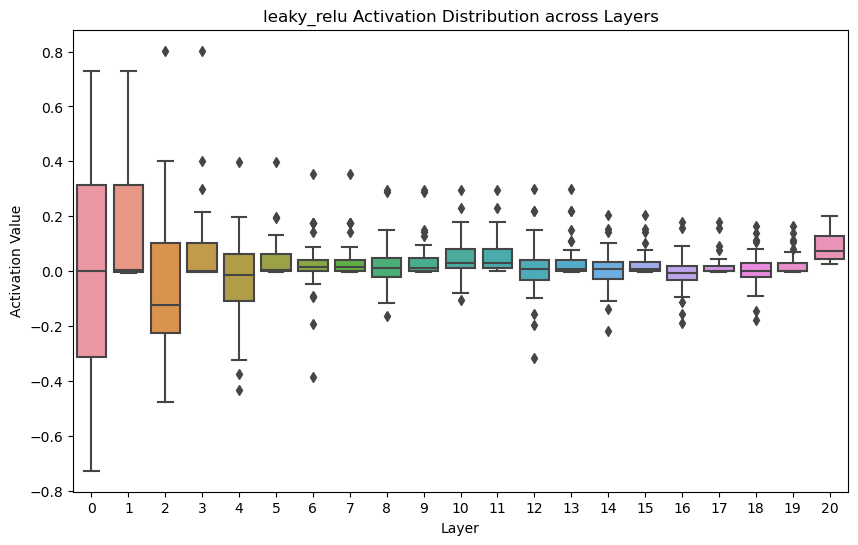

Layer 1 - Mean Activation: 0.0000, Standard Deviation: 0.3614
Layer 2 - Mean Activation: 0.1528, Standard Deviation: 0.2048
Layer 3 - Mean Activation: -0.0587, Standard Deviation: 0.2486
Layer 4 - Mean Activation: 0.0745, Standard Deviation: 0.1489
Layer 5 - Mean Activation: -0.0309, Standard Deviation: 0.1580
Layer 6 - Mean Activation: 0.0437, Standard Deviation: 0.0777
Layer 7 - Mean Activation: 0.0195, Standard Deviation: 0.1088
Layer 8 - Mean Activation: 0.0434, Standard Deviation: 0.0709
Layer 9 - Mean Activation: 0.0215, Standard Deviation: 0.0894
Layer 10 - Mean Activation: 0.0415, Standard Deviation: 0.0702
Layer 11 - Mean Activation: 0.0498, Standard Deviation: 0.0766
Layer 12 - Mean Activation: 0.0574, Standard Deviation: 0.0672
Layer 13 - Mean Activation: 0.0085, Standard Deviation: 0.1058
Layer 14 - Mean Activation: 0.0389, Standard Deviation: 0.0692
Layer 15 - Mean Activation: 0.0042, Standard Deviation: 0.0762
Layer 16 - Mean Activation: 0.0289, Standard Deviation: 0.0473

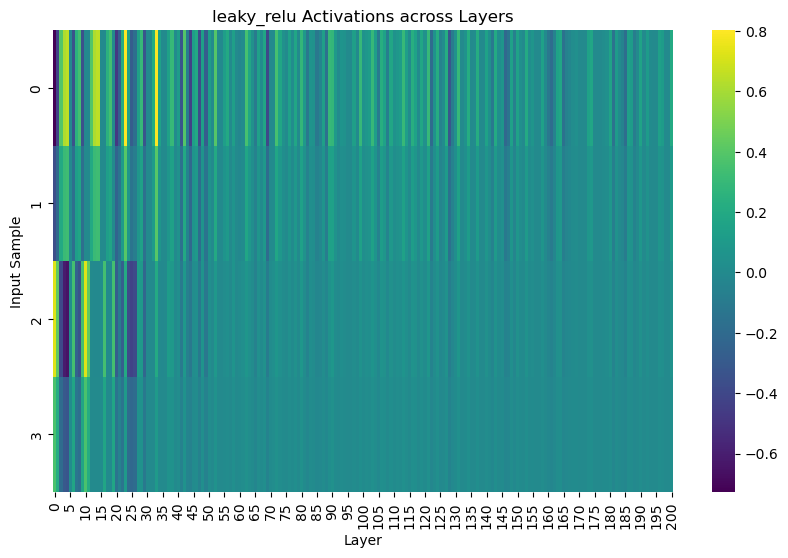

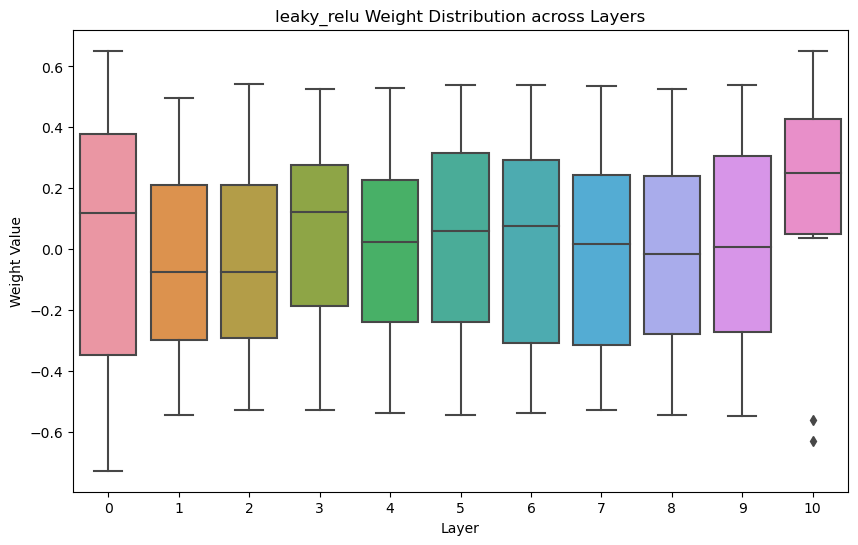

Layer 1 - Mean Weight: 0.0394, Standard Deviation: 0.4554
Layer 2 - Mean Weight: -0.0389, Standard Deviation: 0.3046
Layer 3 - Mean Weight: -0.0334, Standard Deviation: 0.3011
Layer 4 - Mean Weight: 0.0451, Standard Deviation: 0.3028
Layer 5 - Mean Weight: -0.0039, Standard Deviation: 0.3094
Layer 6 - Mean Weight: 0.0423, Standard Deviation: 0.3241
Layer 7 - Mean Weight: 0.0011, Standard Deviation: 0.3310
Layer 8 - Mean Weight: -0.0002, Standard Deviation: 0.3050
Layer 9 - Mean Weight: -0.0183, Standard Deviation: 0.3118
Layer 10 - Mean Weight: 0.0032, Standard Deviation: 0.3320
Layer 11 - Mean Weight: 0.1532, Standard Deviation: 0.4188


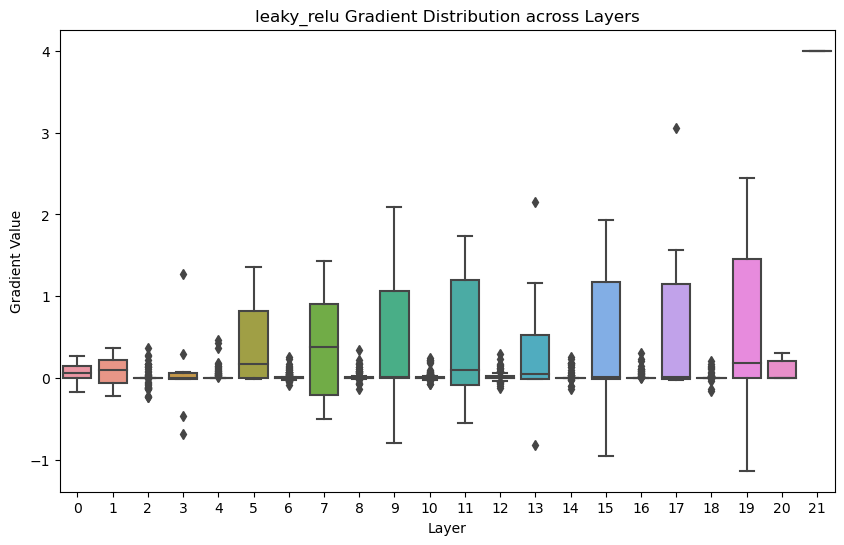

Layer 1 - Mean Gradient: 0.0628, Standard Deviation: 0.1384
Layer 2 - Mean Gradient: 0.0926, Standard Deviation: 0.1851
Layer 3 - Mean Gradient: 0.0074, Standard Deviation: 0.0889
Layer 4 - Mean Gradient: 0.0484, Standard Deviation: 0.4873
Layer 5 - Mean Gradient: 0.0304, Standard Deviation: 0.0810
Layer 6 - Mean Gradient: 0.4166, Standard Deviation: 0.5013
Layer 7 - Mean Gradient: 0.0187, Standard Deviation: 0.0529
Layer 8 - Mean Gradient: 0.3966, Standard Deviation: 0.6866
Layer 9 - Mean Gradient: 0.0199, Standard Deviation: 0.0605
Layer 10 - Mean Gradient: 0.4562, Standard Deviation: 0.8256
Layer 11 - Mean Gradient: 0.0186, Standard Deviation: 0.0558
Layer 12 - Mean Gradient: 0.4451, Standard Deviation: 0.7957
Layer 13 - Mean Gradient: 0.0200, Standard Deviation: 0.0569
Layer 14 - Mean Gradient: 0.3543, Standard Deviation: 0.7687
Layer 15 - Mean Gradient: 0.0178, Standard Deviation: 0.0594
Layer 16 - Mean Gradient: 0.4578, Standard Deviation: 0.8571
Layer 17 - Mean Gradient: 0.0198,

In [11]:
import os
import warnings
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LeakyReLU

# Suppress TensorFlow logs and Python warnings for clearer output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")

def create_network(activation, layers, units, output_units):
    """ 
    Create a neural network model based on the given activation function.
    """
    model = tf.keras.Sequential()
    
    for _ in range(layers):
        if activation == 'leaky_relu':
            model.add(Dense(units))
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Dense(units, activation=activation))
            
    model.add(Dense(output_units))
    model.build(input_shape=(None, 1))
    return model

def get_activations_for_model(model, data):
    """
    Extract activations for the given data.
    """
    return [tf.keras.Model(inputs=model.input, outputs=layer.output).predict(data, verbose=0) for layer in model.layers]

def get_weights_for_model(model):
    """
    Extract weights from the model.
    """
    return [layer.get_weights()[0] for layer in model.layers if layer.get_weights()]

def compute_gradients(model, data):
    """
    Compute gradients for the given data.
    """
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(data)
        predictions = model(data)
    
    gradient_input = tape.gradient(predictions, data)
    gradient_weights = []
    
    for layer in model.layers:
        weights = layer.trainable_weights  # Ensure we only consider trainable weights
        if weights:
            gradients = tape.gradient(predictions, weights)
            gradient_weights.extend(gradients)
    
    return gradient_input, gradient_weights


def plot_activations(activation_type, model, data):
    """
    Plot activations for the given model and data.
    """
    activations = get_activations_for_model(model, data)
    for idx, activation in enumerate(activations):
        plt.figure(figsize=(6, 4))
        plt.hist(activation, bins=50)
        plt.title(f"{activation_type} Activations in Layer {idx+1}")
        plt.xlabel("Activation Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_weights(activation_type, model):
    """
    Plot weight distributions for the given model.
    """
    weights = get_weights_for_model(model)
    for idx, weight in enumerate(weights):
        plt.figure(figsize=(6, 4))
        plt.hist(weight.flatten(), bins=50)
        plt.title(f"{activation_type} Weights in Layer {idx+1}")
        plt.xlabel("Weight Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_gradients(activation_type, model, data):
    """
    Plot gradients for the given model and data.
    """
    _, gradient_weights = compute_gradients(model, data)
    fig, axes = plt.subplots(1, len(gradient_weights), figsize=(6 * len(gradient_weights), 4))
    for idx, gradient in enumerate(gradient_weights):
        if len(gradient_weights) > 1:
            ax = axes[idx]
        else:
            ax = axes
        ax.hist(gradient.numpy().flatten(), bins=50)
        ax.set_title(f"{activation_type} Gradients in Layer {idx+1}")
        ax.set_xlabel("Gradient Value")
        ax.set_ylabel("Frequency")
        ax.grid(True)
    plt.tight_layout()
    plt.show()

def plot_summary(data_list, title, data_type):
    """
    Plot boxplots and summary statistics for activations, weights, or gradients.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    if isinstance(data_list[0], tf.Tensor):  # Check if the data is still in tensor format
        sns.boxplot(data=[d.numpy().flatten() for d in data_list], ax=ax)
    else:
        sns.boxplot(data=[d.flatten() for d in data_list], ax=ax)  # For numpy arrays
    ax.set_title(f"{title} {data_type} Distribution across Layers")
    ax.set_xlabel("Layer")
    ax.set_ylabel(f"{data_type} Value")
    plt.show()

    # Display summary statistics
    for idx, data in enumerate(data_list):
        if isinstance(data, tf.Tensor):  # Check if the data is still in tensor format
            mean_val = np.mean(data.numpy())
            std_val = np.std(data.numpy())
        else:
            mean_val = np.mean(data)
            std_val = np.std(data)
        print(f"Layer {idx+1} - Mean {data_type}: {mean_val:.4f}, Standard Deviation: {std_val:.4f}")

def plot_activations_heatmap(activation_type, model, data):
    """
    Plot heatmap for activations across layers for multiple inputs.
    """
    activations = get_activations_for_model(model, data)
    
    # Check if activations are in tensor format or numpy arrays
    if isinstance(activations[0], tf.Tensor):
        activations_matrix = np.hstack([act.numpy() for act in activations])
    else:
        activations_matrix = np.hstack(activations)  # Directly stack if already numpy arrays
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(activations_matrix, cmap='viridis', cbar=True)
    plt.title(f"{activation_type} Activations across Layers")
    plt.xlabel("Layer")
    plt.ylabel("Input Sample")
    plt.show()

def analyze_networks(models, data):
    """
    Analyze activations, weights, and gradients for all models.
    """
    for activation_type, model in models.items():
        print(f"\nAnalysis for {activation_type.upper()} Activation\n{'-'*40}")
        
        activations = get_activations_for_model(model, data)
        plot_summary(activations, activation_type, "Activation")
        plot_activations_heatmap(activation_type, model, data)

        weights = get_weights_for_model(model)
        plot_summary(weights, activation_type, "Weight")

        _, gradient_weights = compute_gradients(model, data)
        plot_summary(gradient_weights, activation_type, "Gradient")

        print("\n\n")

# Test the functions
ACTIVATIONS = ['sigmoid', 'relu', 'tanh', 'leaky_relu']
models_dict = {activation: create_network(activation, 10, 10, 1) for activation in ACTIVATIONS}
data_batch = tf.constant([[1.0], [0.5], [-1.0], [-0.5]])
analyze_networks(models_dict, data_batch)


# Why Leaky ReLU exhibits a distinct behavior?

- **No Zero Slope**: Unlike standard ReLU, Leaky ReLU retains a small gradient for negative inputs. This prevents 'dead neurons' – neurons that never activate.
  
- **Deep Networks**: Activation functions' effects intensify in deep networks. For sigmoid, gradients can vanish in deep layers due to minuscule gradient values. Standard ReLU's gradients can vanish for negative inputs or stay consistent for positive ones. However, Leaky ReLU's gradient remains slightly positive for negative inputs. __In deeper layers, these minute gradients can compound, resulting in significant activations__.

- **Initialization**: The manner in which weights and biases are initialized can sway activation behaviors. If initial conditions push Leaky ReLU's activations mostly towards negative values, growing network depth might amplify these activations, especially if negative values consistently pass through Leaky ReLU.

- **Network Design**: The overall architecture, encompassing neuron count, layer structure, and inter-neuronal connections, can modulate activation behaviors. Certain designs might amplify or suppress activations.

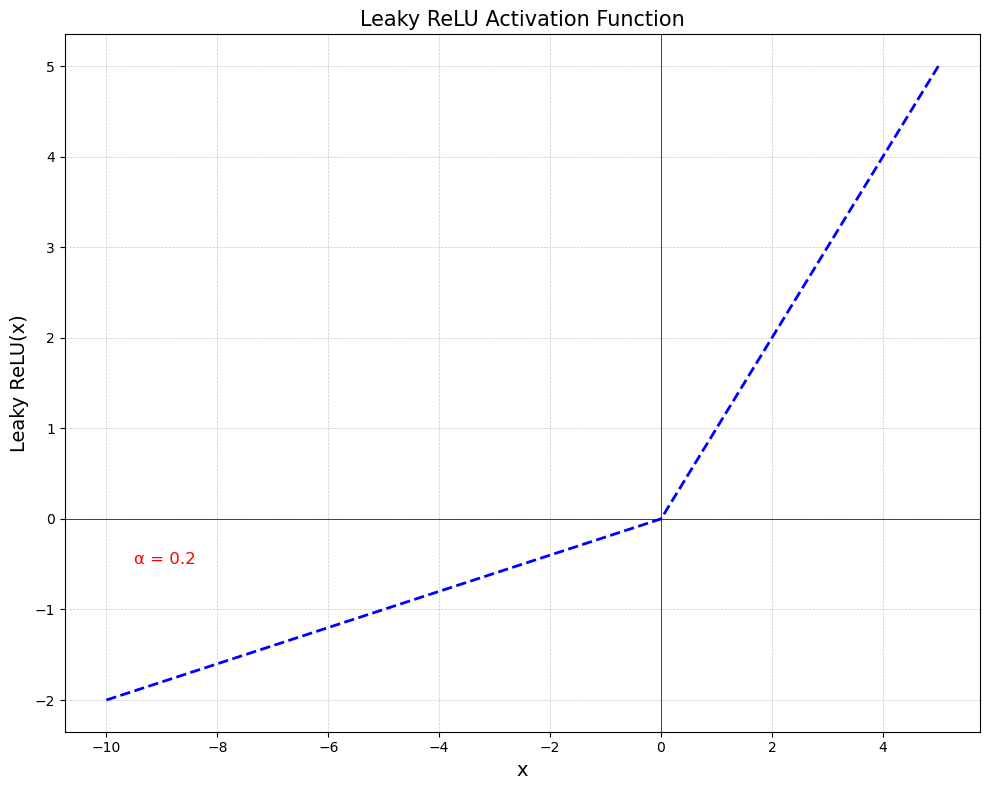

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def updated_leaky_relu_plot(alpha=0.2):
    # Define x range
    x = np.linspace(-10, 5, 600)

    # Compute Leaky ReLU values
    y = leaky_relu(x, alpha=alpha)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, 'b--', linewidth=2)  # Dashed line style
    plt.title('Leaky ReLU Activation Function', fontsize=15)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Leaky ReLU(x)', fontsize=14)  # Updated y-label
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Updated grid style
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Annotate the value of alpha
    plt.annotate(f'α = {alpha}', xy=(-9.5, -0.5), color='red', fontsize=12)

    plt.tight_layout()
    plt.show()

# Generate the updated plot
updated_leaky_relu_plot()

### Leaky ReLU introduces a slight slope for negative inputs, preventing neurons from becoming inactive, thus addressing the 'dying ReLU' problem in deep networks.
---
- **Positive Inputs**: Demonstrates linear behavior $f(x) = x$, facilitating unhindered gradient flow.
- **Negative Inputs**: Not flat like standard ReLU; has a slight slope, typically 0.01, determined by the $ \alpha $ parameter. Here, $\alpha = 0.2$.
- **Dead Neuron Mitigation**: The minimal slope ensures neurons remain active.
- **Continuity**: Leaky ReLU is continuous, but non-smooth at $ x=0$.
- **Extremal Behavior**: As $x$ tends to $ \pm \infty $, the function behavior is linear or gradually declining.

---

<h2 id="credits" style="color: #4CAF50;">🥇 Credits ⤵︎ </h2>
<h4 style="color: #2196F3;">For more information, visit the works of:</h4>
<ul style="list-style-type: square;">
  <li><a href="https://arxiv.org/pdf/2109.14545.pdf">Dubey, Singh, Chaudhuri. Activation Functions in Deep Learning: A Comprehensive Survey and Benchmark. Neurocomputing, 2021.</a></li>
  <li><a href="https://github.com/shivram1987/ActivationFunctions">GitHub: ActivationFunctions</a></li>
  <li><a href="https://medium.com/geekculture/different-activation-functions-for-deep-neural-networks-you-should-know-ea5e86f51e84">Medium: Different Activation Functions for Deep Neural Networks</a></li>
</ul>

<div style="background-color: #f2f2f2; padding: 53px; border-radius: 5px;">
  <h3>If you found this notebook helpful...</h3>
  <p>
  Please consider giving it a star. Your support helps me continue to develop high-quality code and pursue my career as a data analyst/engineer. Feedback is always welcome and appreciated. Thank you for taking the time to read my work! 
  </p> 
  <h4>
  <p style="text-align: right;">
  <a href="https://github.com/patmejia"> - pat [¬º-°]¬ </a>
  </h4>
  </p>
</div>